In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Known constants
gamma = 1.4
gm1 = gamma - 1
gp1 = gamma + 1
R = 287 # J/(kg*K)

# Given variables
T1 = 300 # K
T4 = 300 # K
P1 = 100 # kPa
P4 = P1 * 5 # P4/P1 = 5

In [3]:
a1 = np.sqrt(gamma * R * T1)
a4 = np.sqrt(gamma * R * T4)

P2_P1 = 2.12787 # from WolframAlpha
P2 = P1 * P2_P1

numerator = gp1/gm1 + P2_P1
denominator = 1 + gp1*P2_P1/gm1
T2 = T1 * P2_P1 * numerator/denominator # K

P3_P4 = P2_P1/(P4/P1) # P3/P4 = P2/P4
P3 = P4 * P3_P4 # kPa

T3 = T4 * P3_P4**(gm1/gamma) # K

W = a1*np.sqrt(gp1/2/gamma*(P2_P1 - 1) + 1) # m/s
up = a1/gamma * (P2_P1 - 1) * np.sqrt(2*gamma/(P2_P1*gp1 + gm1)) # m/s
U1 = 0
u2 = up

a3 = np.sqrt(gamma * R * T3) # m/s

rho1 = P1/(R*T1)
rho2 = rho1 * ((1 + gp1*P2/(gm1*P1))/(gp1/gm1 + P2/P1))
rho4 = P4/(R*T4)
rho3 = (P3/P4)**(1/gamma) * rho4

u1 = 0
u3 = u2
u4 = 0

In [4]:
def xvals(t, diaphragm):
    xhd = diaphragm - a1 * t # head of rarefaction
    xft = diaphragm + (up - a3) * t # foot of rarefaction
    xcd = diaphragm + up * t # contact discontinuity
    xsh = diaphragm + W * t # shock wave
    
    return xhd, xft, xcd, xsh

In [5]:
def waves(t_f, points):
    dt = t_f/(100 - 1)
    diaphragm = 200
    
    t_arr = []
    xhd_arr = []
    xft_arr = []
    xcd_arr = []
    xsh_arr = []
    
    for i in range(points):
        t_arr.append(dt * i)
        xhd, xft, xcd, xsh = xvals(dt * i, diaphragm)
        xhd_arr.append(xhd)
        xft_arr.append(xft)
        xcd_arr.append(xcd)
        xsh_arr.append(xsh)
    
    return t_arr, xhd_arr, xft_arr, xcd_arr, xsh_arr

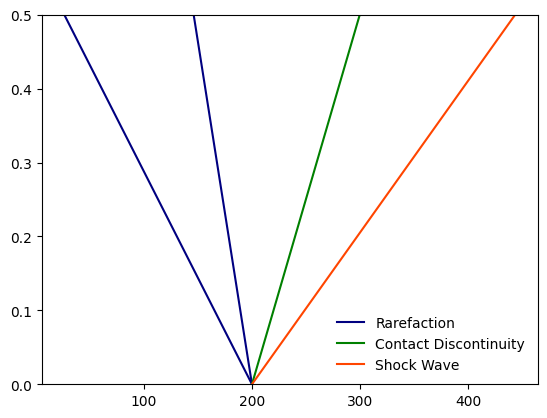

In [6]:
t_arr, xhd_arr, xft_arr, xcd_arr, xsh_arr = waves(0.5, 100)

plt.plot(xhd_arr, t_arr, color='navy', label='Rarefaction')
plt.plot(xft_arr, t_arr, color='navy')
plt.plot(xcd_arr, t_arr, color='green', label='Contact Discontinuity')
plt.plot(xsh_arr, t_arr, color='orangered', label='Shock Wave')
plt.legend(frameon=False)
plt.ylim(t_arr[0], t_arr[-1])
plt.show()